In [1]:
import pandas as pd

df = pd.read_csv("imports-exports-commerciaux.csv",sep=";")
print(df.columns)

Index(['date', 'position', 'fr_gb', 'gb_fr', 'fr_cwe', 'cwe_fr', 'fr_ch',
       'ch_fr', 'fr_it', 'it_fr', 'fr_es', 'es_fr', 'export_france',
       'import_france'],
      dtype='object')


In [2]:
# On reformate la date et l'heure en combinant les colonnes "date" et "position" (qui représente l'heure) dans une seule colonne timestamp
from datetime import datetime
def heure(n) :
    if n < 10 :
        return f"0{int(n)}"
    else :
        return str(int(n))

df["timestamp"] = df["date"]+ "-"+ df["position"].map(heure)
df

,date,position,fr_gb,gb_fr,fr_cwe,cwe_fr,fr_ch,ch_fr,fr_it,it_fr,fr_es,es_fr,export_france,import_france,timestamp
0,2010-09-15,10.0,25.0,-384.0,591.0,-2055.0,3017.0,-1898.0,2403.0,0.0,200.0,-568.0,6236.0,-4905.0,2010-09-15-10
1,2010-09-15,12.0,25.0,-125.0,271.0,-2253.0,3067.0,-2104.0,2404.0,0.0,19.0,-399.0,5786.0,-4881.0,2010-09-15-12
2,2010-09-15,14.0,45.0,-76.0,304.0,-2734.0,3046.0,-2052.0,2404.0,0.0,203.0,-361.0,6002.0,-5223.0,2010-09-15-14
3,2010-09-15,16.0,25.0,-296.0,333.0,-2257.0,3067.0,-975.0,2404.0,0.0,203.0,-221.0,6032.0,-3749.0,2010-09-15-16
4,2010-09-15,17.0,293.0,-305.0,392.0,-2468.0,3031.0,-656.0,2404.0,0.0,203.0,-263.0,6323.0,-3692.0,2010-09-15-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149011,2015-04-08,4.0,2000.0,0.0,2361.5,-3085.0,2896.2,-1028.8,1699.0,-36.0,0.0,-900.0,8956.0,-5049.0,2015-04-08-04
149012,2015-04-08,11.0,1999.0,-16.0,2214.3,-3639.0,3241.5,-2196.5,783.0,-757.0,0.0,-100.0,8237.0,-6708.0,2015-04-08-11
149013,2015-04-08,19.0,2000.0,0.0,2398.6,-3032.0,3616.9,-1167.6,3175.0,-50.0,277.0,-100.0,11466.0,-4349.0,2015-04-08-19
149014,2015-04-08,21.0,2000.0,0.0,3588.8,-3634.2,3951.0,-1967.8,3152.0,-9.0,0.0,-100.0,12691.0,-5710.0,2015-04-08-21


In [3]:
# On enlève les colonnes qui ne nous intéressent pas, c'est à dire toutes celles concernant l'échange spécifique entre la france et un seul autre pays, étant donné que les colonnes imports et exports sont la somme de ces valeurs
df = df.drop(["fr_gb","gb_fr","fr_cwe","cwe_fr","fr_ch","ch_fr","fr_it","it_fr","fr_es","es_fr","date","position","import_france"],axis=1)

In [4]:
df = df.sort_values(by="timestamp")
print(df[-30:])

        export_france      timestamp
87081         13024.0  2021-12-30-19
111596        13459.0  2021-12-30-20
86233         14033.0  2021-12-30-21
32925         12965.0  2021-12-30-22
144207        11875.0  2021-12-30-23
87086         12004.0  2021-12-30-24
87091         11131.0  2021-12-31-01
111601        10888.0  2021-12-31-02
32930         10836.0  2021-12-31-03
111606        10681.0  2021-12-31-04
111611        10340.0  2021-12-31-05
32935         10162.0  2021-12-31-06
86238         10230.0  2021-12-31-07
87096         10499.0  2021-12-31-08
32940         11210.0  2021-12-31-09
111616        10328.0  2021-12-31-10
87101          9919.0  2021-12-31-11
87106         11022.0  2021-12-31-12
111621        11106.0  2021-12-31-13
144212        11456.0  2021-12-31-14
86243          9635.0  2021-12-31-15
87111          9554.0  2021-12-31-16
111626         8474.0  2021-12-31-17
87116          8742.0  2021-12-31-18
86248         10430.0  2021-12-31-19
32945         10484.0  2021-12-31-20
3

In [5]:
# Teste si toutes les valeurs sont présentes
Liste = sorted(df["timestamp"].tolist())
i=0
booleen = False
while i < len(Liste)-1 and not booleen:
    if Liste[i] == Liste[i+1]:
        print(Liste[i])
        booleen = True
    i+=1
print("Il y a des doublons dans les dates : "+str(booleen))
#On calcule le nombre de dates attendues, 
#comme on sait qu'il n'y a pas de doublons, 
# si la taille de la liste est le nombre de valeurs attendues, 
# alors il ne manque aucune données
j_par_mois = [31,28,31,30,31,30,31,31,30,31,30,31]
nbr_29_fevrier = 4 #nombre d'années bissextiles entre 2005 et 2022
nbr_valeurs_attendu = (sum(j_par_mois)*(2022-2005)+nbr_29_fevrier)*24

print(f"nombre de dates attendues : {nbr_valeurs_attendu}\nnombre de valeurs réel : {len(Liste)}")

Il y a des doublons dans les dates : False
nombre de dates attendues : 149016
nombre de valeurs réel : 149016


In [6]:
print(df["export_france"].max())
print(df["export_france"].min())

31748.0
45.0


# Traitement des données

In [18]:
# Imports

import numpy as np
import torch
import torch.nn as nn
import math as m
import matplotlib.pyplot as plt
import sys
import copy

In [19]:
# Variables globales

h = 10
nepochs = 1
dn = 50000.
nout = 1
ker = 7


In [20]:
# Tranformer les données en dataloader

exports = np.array(df["export_france"].tolist())/dn
#exports = torch.Tensor(exports).view(24, -1)

# On sépare les données 
#          train : 2005-2017
#          validation : 2018-2019
#          test : 2020-2021

train_nbr = (sum(j_par_mois)*(2018-2005)+nbr_29_fevrier-1)*24

validation_nbr = train_nbr +  (sum(j_par_mois)*(2020-2018))*24
test_nbr = validation_nbr + (sum(j_par_mois)*(2022-2020)+1)*24


train = exports[:train_nbr]
validation = exports[train_nbr:validation_nbr]
test = exports[validation_nbr:]

def xety(data) :
    data_jour = torch.Tensor(data).view(-1,24)
    x = data_jour[:-1].view(1, 24, -1)
    y = data_jour[7:].view(1, 24, -1)
    return x,y

trainx,trainy = xety(train)
validx,validy = xety(validation)
testx,testy = xety(test)

# trainx = 1, seqlen, 1
# trainy = 1, seqlen, 1
trainds = torch.utils.data.TensorDataset(trainx, trainy)
trainloader = torch.utils.data.DataLoader(trainds, batch_size=1, shuffle=False)
validds = torch.utils.data.TensorDataset(validx, validy)
validloader = torch.utils.data.DataLoader(validds, batch_size=1, shuffle=False)
testds = torch.utils.data.TensorDataset(testx, testy)
testloader = torch.utils.data.DataLoader(testds, batch_size=1, shuffle=False)
crit = nn.MSELoss()


# Modèle

torch.Size([1, 24, 730])
torch.Size([1, 24, 4747])
torch.Size([1, 24, 730])
torch.Size([1, 24, 4747])
torch.Size([1, 24, 730])
torch.Size([1, 24, 4747])
torch.Size([1, 24, 730])
torch.Size([1, 24, 4747])
torch.Size([1, 24, 730])
torch.Size([1, 24, 4747])
torch.Size([1, 24, 730])
torch.Size([1, 24, 4747])
torch.Size([1, 24, 730])
torch.Size([1, 24, 4747])
torch.Size([1, 24, 730])
torch.Size([1, 24, 4747])


/home/alexio/.local/lib/python3.8/site-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([1, 24, 724])) that is different to the input size (torch.Size([24, 724])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/alexio/.local/lib/python3.8/site-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([1, 24, 4741])) that is different to the input size (torch.Size([24, 4741])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


torch.Size([1, 24, 730])
torch.Size([1, 24, 4747])
torch.Size([1, 24, 730])
torch.Size([1, 24, 4747])
torch.Size([1, 24, 730])
torch.Size([1, 24, 4747])
torch.Size([1, 24, 730])
torch.Size([1, 24, 4747])
torch.Size([1, 24, 730])
torch.Size([1, 24, 4747])
torch.Size([1, 24, 730])
torch.Size([1, 24, 4747])
torch.Size([1, 24, 730])
torch.Size([1, 24, 4747])
torch.Size([1, 24, 730])
torch.Size([1, 24, 4747])
torch.Size([1, 24, 730])
torch.Size([1, 24, 4747])
torch.Size([1, 24, 730])
torch.Size([1, 24, 4747])
torch.Size([1, 24, 730])
torch.Size([1, 24, 4747])
torch.Size([1, 24, 730])
torch.Size([1, 24, 4747])
torch.Size([1, 24, 730])
torch.Size([1, 24, 4747])
torch.Size([1, 24, 730])
torch.Size([1, 24, 4747])
torch.Size([1, 24, 730])
torch.Size([1, 24, 4747])
torch.Size([1, 24, 730])
torch.Size([1, 24, 4747])
torch.Size([1, 24, 730])
torch.Size([1, 24, 4747])
torch.Size([1, 24, 730])
torch.Size([1, 24, 4747])
torch.Size([1, 24, 730])
torch.Size([1, 24, 4747])
torch.Size([1, 24, 730])
torch.

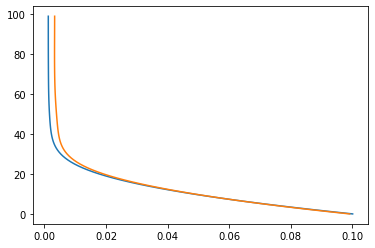

In [22]:

class Mod(nn.Module):
    def __init__(self):
        super(Mod, self).__init__()
        self.cnn = nn.Sequential(nn.Conv1d(24,24, 3, stride=1),
                                 nn.Sigmoid(),
                                 nn.Conv1d(24, 24, 3, stride=1),
                                 nn.Sigmoid(),
                                 nn.Conv1d(24, 24, 3, stride=1),
                                 nn.Sigmoid())
        self.rnn = nn.Sequential(nn.RNN(24, 24, num_layers=3),
                                 nn.Sigmoid())
    def forward(self, x):
        # x.shape = (1,351,7) -> (N,Hin,L)
        # cnn needs (N,L,Hin) (B,D,T)(batch,time,dim)
        print(x.shape)
        # 1 724 1 
        xx = x.view(1,24,-1)
        y = self.cnn(xx)
        # y.shape = (1,1,346)
        return y.squeeze(0).squeeze(0)


def test(mod):
    mod.train(False)
    totloss, nbatch = 0., 0
    for data in testloader:
        inputs, goldy = data
        haty = mod(inputs)
        loss = crit(haty, goldy)
        totloss += loss.item()
        nbatch += 1
    totloss /= float(nbatch)
    mod.train(True)
    return totloss

def train(mod, nepochs, lr):
    optim = torch.optim.Adam(mod.parameters(), lr=lr)
    tab_train_loss = []
    tab_test_loss = []
    for epoch in range(nepochs):
        testloss = test(mod)
        totloss, nbatch = 0., 0
        for data in trainloader:
            inputs, goldy = data
            optim.zero_grad()
            haty = mod(inputs)
            loss = crit(haty, goldy)
            totloss += loss.item()
            nbatch += 1
            loss.backward()
            optim.step()
        totloss /= float(nbatch)
        tab_train_loss.append(totloss)
        tab_test_loss.append(testloss)
        # print("err", totloss, testloss)
    # print("fin", totloss, testloss, file=sys.stderr)
    return tab_train_loss, tab_test_loss


if __name__ == "__main__":
    tab_value = []
    tab_loss = []
    n_epochs = 100
    model = Mod()
    a,b = train(model,n_epochs,lr=0.001)
    plt.plot(a,range(len(a)))
    plt.plot(b,range(len(b)))
    plt.show()



In [ ]:
m = nn.Conv1d(16, 33, 3, stride=2)
input = torch.randn(20, 16, 10)
output = m(input)
print(output.shape)

24,

torch.Size([20, 33, 4])
